In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame with a semicolon separator
biovid_file_path = '/home/abidhasan/Documents/DA_Project/BioVid/results/5_loso_biovid.csv'  # Replace with the actual path to your CSV file
pain_file_path = '/home/abidhasan/Documents/DA_Project/BioVid/results/5_loso_painmonit.csv'
df_biovid = pd.read_csv(biovid_file_path, sep=';')
df_pain = pd.read_csv(pain_file_path, sep=';')

In [54]:
max_acc = df_biovid.groupby(['Aug_method'])['Max_acc_mean'].max()
print(max_acc)

Aug_method
DGW         83,85
RGW          84,2
TW          84,35
convolve    83,85
crop        83,85
drift       84,05
jitter      84,25
quantize    84,05
rotation    82,59
Name: Max_acc_mean, dtype: object


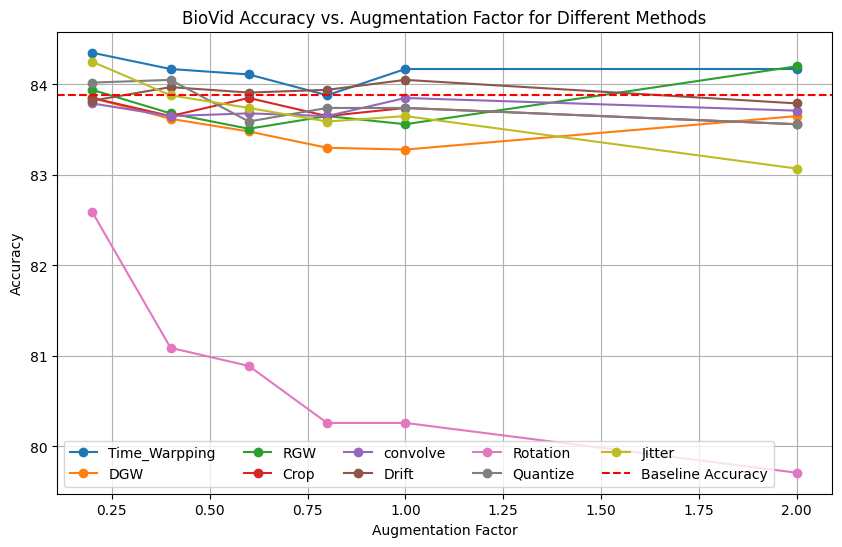

In [67]:

# Sample data (replace this with your actual data)
augmentation_factors = [0.2, 0.4,  0.6, 0.8, 1 , 2]
DGW = [83.85, 83.62, 83.48, 83.3, 83.28, 83.65]
RGW = [83.94,83.68, 83.51, 83.65, 83.56, 84.2]
TW = [84.35, 84.17, 84.11, 83.88, 84.17, 84.17]
crop = [83.85, 83.65, 83.85, 83.65, 83.74, 83.56]
convolve = [83.79, 83.65, 83.68, 83.65, 83.85, 83.71]
drift = [83.82, 83.97, 83.91, 83.94, 84.05, 83.79]
rotation = [82.59, 81.09, 80.89, 80.26, 80.26, 79.71]
quantize = [84.02, 84.05, 83.59, 83.74, 83.74, 83.56]
jitter = [84.25, 83.88, 83.74, 83.59, 83.65, 83.07]

# Baseline accuracy
biovid_baseline_accuracy = 83.88

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(augmentation_factors, TW, marker='o', label='Time_Warpping')
plt.plot(augmentation_factors, DGW, marker='o', label='DGW')
plt.plot(augmentation_factors, RGW, marker='o', label='RGW')
plt.plot(augmentation_factors, crop, marker='o', label='Crop')
plt.plot(augmentation_factors, convolve, marker='o', label='convolve')
plt.plot(augmentation_factors, drift, marker='o', label='Drift')
plt.plot(augmentation_factors, rotation, marker='o', label='Rotation')
plt.plot(augmentation_factors, quantize, marker='o', label='Quantize')
plt.plot(augmentation_factors, jitter, marker='o', label='Jitter')
# Plotting baseline accuracy as a horizontal line
plt.axhline(y=biovid_baseline_accuracy, color='r', linestyle='--', label='Baseline Accuracy')

plt.xlabel('Augmentation Factor')
plt.ylabel('Accuracy')
plt.title('BioVid Accuracy vs. Augmentation Factor for Different Methods')
plt.legend(loc='lower left', ncols = 5)
plt.grid(True)
plt.show()

In [79]:
df_pain.groupby('Aug_method')['Max_F1_mean'].max()

Aug_method
DGW         87,79
RGW          88,0
TW           88,1
convolve    89,33
crop        87,55
drift       88,47
jitter      89,01
quantize     88,8
rotation    86,93
Name: Max_F1_mean, dtype: object

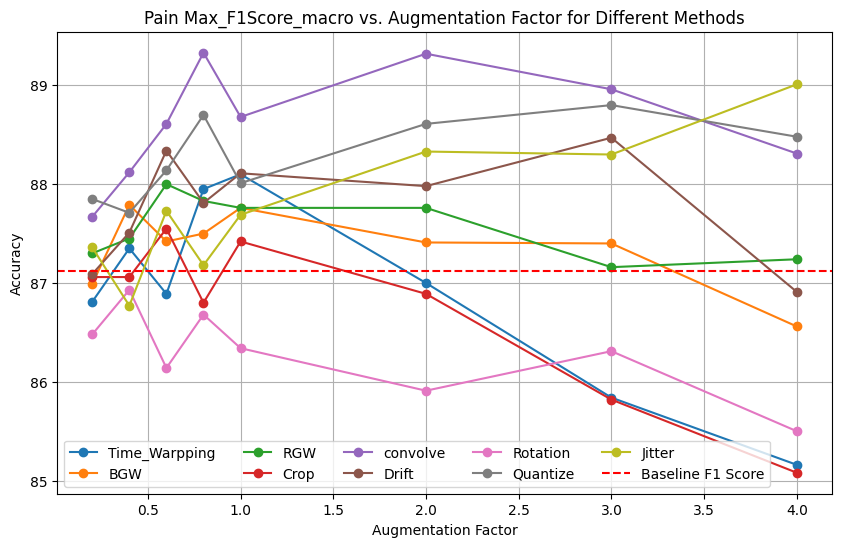

In [66]:
# Sample data (replace this with your actual data)
augmentation_factors = [0.2, 0.4, 0.6, 0.8, 1, 2 ,3, 4]
DGW = [86.99, 87.79, 87.42, 87.5, 87.76, 87.41, 87.4, 86.56]
RGW = [87.3, 87.45, 88.0, 87.83, 87.76, 87.76, 87.16, 87.24]
TW = [86.81 , 87.35, 86.89, 87.95, 88.1, 87.0, 85.84, 85.16]
crop = [87.06 ,87.06, 87.55, 86.8, 87.42, 86.89, 85.82, 85.08]
convolve = [87.67, 88.12, 88.61, 89.33, 88.68, 89.32, 88.96, 88.31]
drift = [87.09, 87.51, 88.34, 87.81, 88.11, 87.98, 88.47, 86.91]
rotation = [86.48, 86.93, 86.14, 86.68, 86.34, 85.91, 86.31, 85.5]
quantize = [87.85, 87.71, 88.14, 88.7, 88.01, 88.61, 88.8, 88.48]
jitter = [87.36, 86.77, 87.73, 87.18, 87.69, 88.33, 88.3, 89.01]

# Baseline accuracy
pain_baseline_f1score = 87.12

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(augmentation_factors, TW, marker='o', label='Time_Warpping')
plt.plot(augmentation_factors, DGW, marker='o', label='DGW')
plt.plot(augmentation_factors, RGW, marker='o', label='RGW')
plt.plot(augmentation_factors, crop, marker='o', label='Crop')
plt.plot(augmentation_factors, convolve, marker='o', label='convolve')
plt.plot(augmentation_factors, drift, marker='o', label='Drift')
plt.plot(augmentation_factors, rotation, marker='o', label='Rotation')
plt.plot(augmentation_factors, quantize, marker='o', label='Quantize')
plt.plot(augmentation_factors, jitter, marker='o', label='Jitter')
# Plotting baseline accuracy as a horizontal line
plt.axhline(y=pain_baseline_f1score, color='r', linestyle='--', label='Baseline F1 Score')

plt.xlabel('Augmentation Factor')
plt.ylabel('Accuracy')
plt.title('Pain Max_F1Score_macro vs. Augmentation Factor for Different Methods')
plt.legend(loc='lower left', ncols = 5)
plt.grid(True)
plt.show()

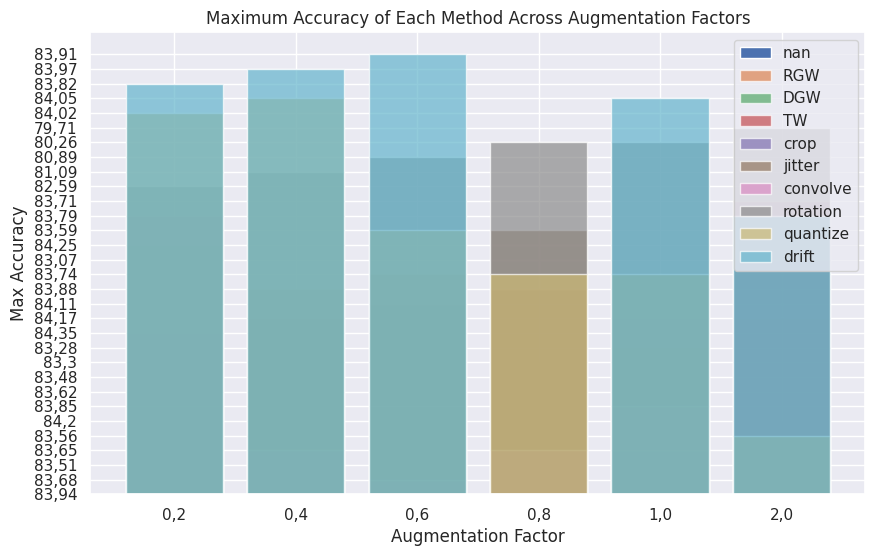

In [80]:
# Get unique method names
methods = df_biovid['Aug_method'].unique()

# Plot the maximum accuracy for each method
plt.figure(figsize=(10, 6))

for method in methods:
    method_data = df_biovid[df_biovid['Aug_method'] == method]
    #plt.plot(method_data['Aug_factor'], method_data['Max_acc_mean'], label=method)
    plt.bar(method_data['Aug_factor'], method_data['Max_acc_mean'], label=method, alpha=0.7)

plt.xlabel('Augmentation Factor')
plt.ylabel('Max Accuracy')
plt.title('Maximum Accuracy of Each Method Across Augmentation Factors')
plt.legend()
plt.show()

83,85
